# Geohackweek participant selection

In [205]:
%matplotlib inline
import os
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import entrofy
import entrofy.mappers
import entrofy.core

import six

seed = 20170615

In [206]:
# Get credentials
scope = ['https://spreadsheets.google.com/feeds']

credentials = ServiceAccountCredentials.from_json_keyfile_name('Geohackweek2017-adf8548865eb.json', scope)

gc = gspread.authorize(credentials)

In [207]:
# See available sheets
gc.openall()

[<Spreadsheet 'Event Registration (Responses)' id:1mh5I8oIlVCtNB80nIcuwvTJsichHpaB2D_Os-iuCCEo>]

In [208]:
sheets = gc.open_by_key('1mh5I8oIlVCtNB80nIcuwvTJsichHpaB2D_Os-iuCCEo')

In [209]:
ws = sheets.get_worksheet(0)

In [210]:
rec = ws.get_all_records()

In [211]:
df = pd.DataFrame.from_records(rec)

In [212]:
len(df)

92

In [213]:
df.columns

Index(['Do you have any specific project you intend to bring to Geo Hackweek?',
       'Do you have any specific topics you would like to learn about at Geo Hackweek?',
       'Do you have specific datasets that you would like to share at Geo Hackweek to work on with other groups? ',
       'Email Address', 'Experience with geospatial datasets',
       'Familiarity with command line interfaces', 'First Name',
       'Have you applied to Geo Hackweek before and not been selected for participation?',
       'Have you attended any hack day or hack week before?',
       'In terms of gender identity, do you consider yourself a minority with respect to the field of geospatial science?',
       'In terms of racial or ethnic identity, do you consider yourself a minority with respect to the field of geospatial science?',
       'Institution or Organization',
       'Is there a topic you could imagine teaching at Geo Hackweek?',
       'Last Name', 'Programming experience',
       'The main reas

In [214]:
new_cols = ['specific_project', 
            'specific_topics', 
            'specific_datasets', 
            'email', 
            'exp_geospatial', 
            'exp_cmd', 
            'first_name', 
            'apply_geohack',
            'apply_hack', 
            'gender_minor', 
            'ethnic_minor',
            'org_institute',
            'teach_topic',
            'last_name',
            'exp_prog',
            'reason_attend',
            'timestamp',
            'person_url',
            'location',
            'position',
            'science_work',
            'need_financial']

In [215]:
df.columns = new_cols

In [216]:
#df = df.drop(['email', 'person_url', 'org_institute', 'first_name', 'last_name', 'reason_attend'], 
#        axis=1)

In [217]:
df.replace('', np.NaN, regex=True, inplace=True)
df.replace('None', np.NaN, regex=True, inplace=True)
df["ethnic_minor"].replace('Yes','True', regex=True, inplace=True)
df["ethnic_minor"].replace('No','False', regex=True, inplace=True)


In [218]:
fixed_categories = ['location', 
                    'position', 
                    'science_work', 
                    'exp_prog', 
                    'exp_geospatial', 
                    'exp_cmd', 
                    'apply_hack', 
                    'apply_geohack', 
                    'need_financial', 
                    'gender_minor', 
                    'ethnic_minor']

In [219]:
def make_plot(column_str):
    ax = entrofy.plotting.plot_distribution(df, column_str,
                                        xtype="categorical",
                                        cmap="YlGnBu", ax=None)
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation='vertical')

### What is your current geographical location?

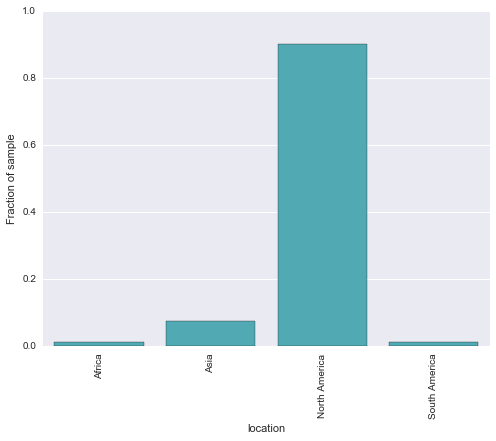

In [220]:
make_plot(fixed_categories[0])

### What is your current position?

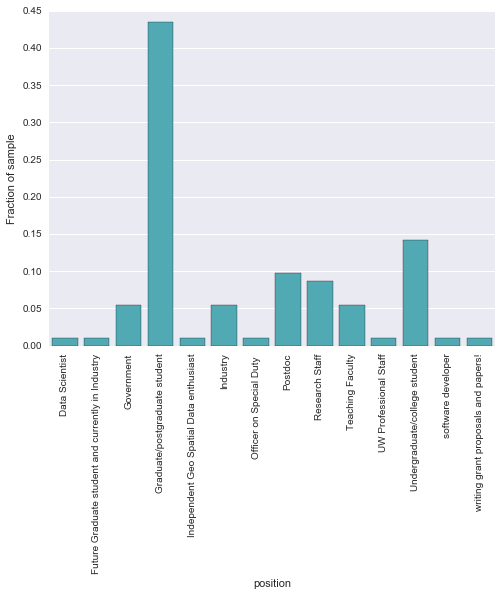

In [221]:
make_plot(fixed_categories[1])

### What is your primary science/work focus?

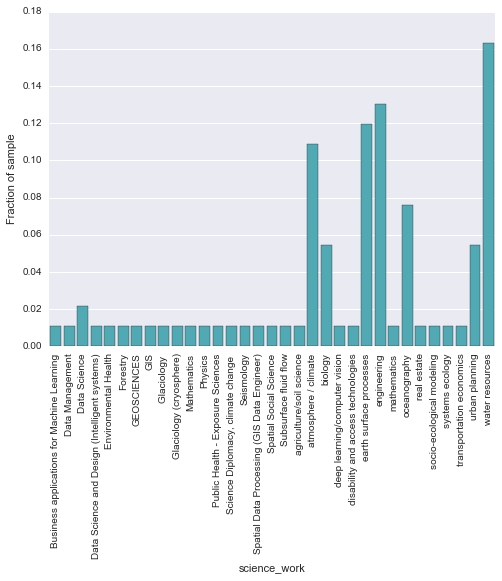

In [222]:
make_plot(fixed_categories[2])

### Programming experience

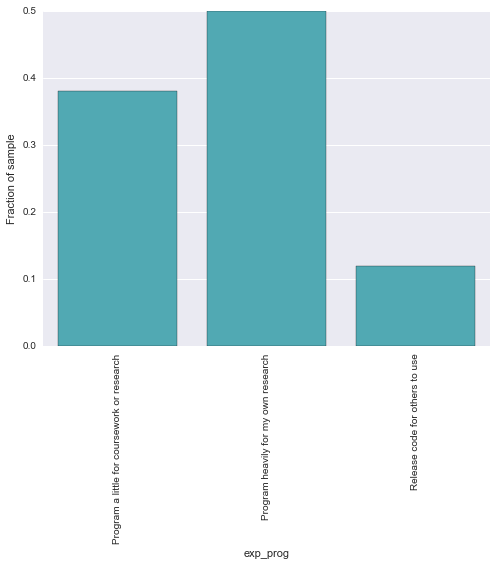

In [223]:
make_plot(fixed_categories[3])

### In terms of racial or ethnic identity, do you consider yourself a minority with respect to the field of geospatial science?

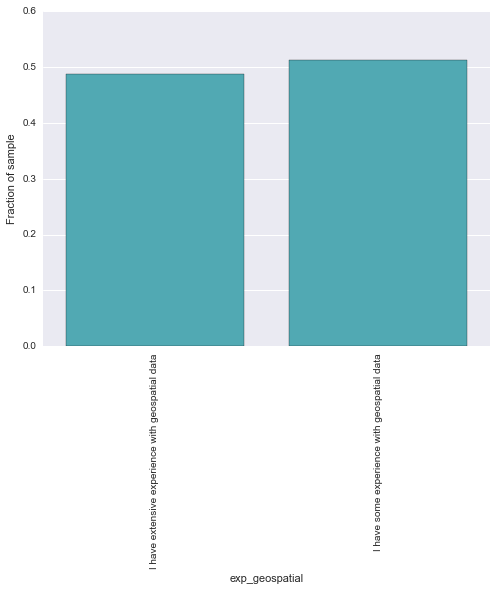

In [224]:
make_plot(fixed_categories[4])

### Familiarity with command line interfaces

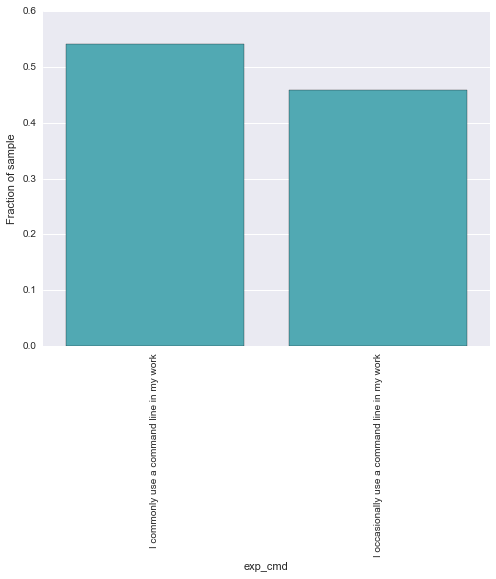

In [225]:
make_plot(fixed_categories[5])

### Have you attended any hack day or hack week before?

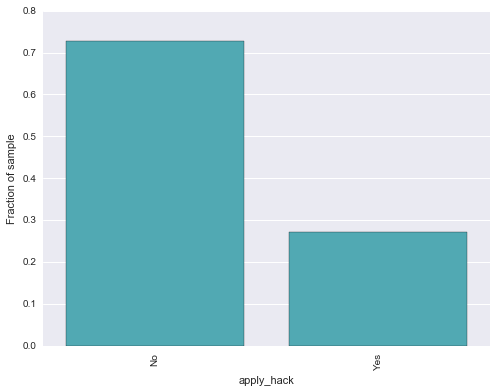

In [226]:
make_plot(fixed_categories[6])

### Have you applied to Geo Hackweek before and not been selected for participation?

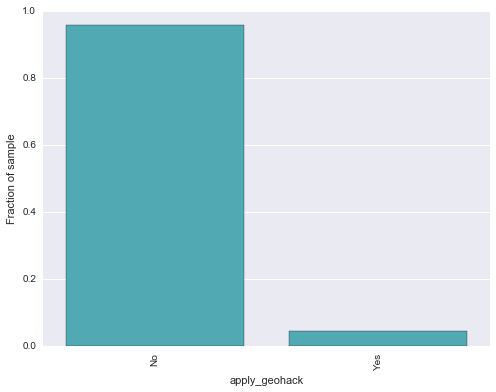

In [227]:
make_plot(fixed_categories[7])

### Will you be likely to need financial support from us to attend Geo Hackweek?

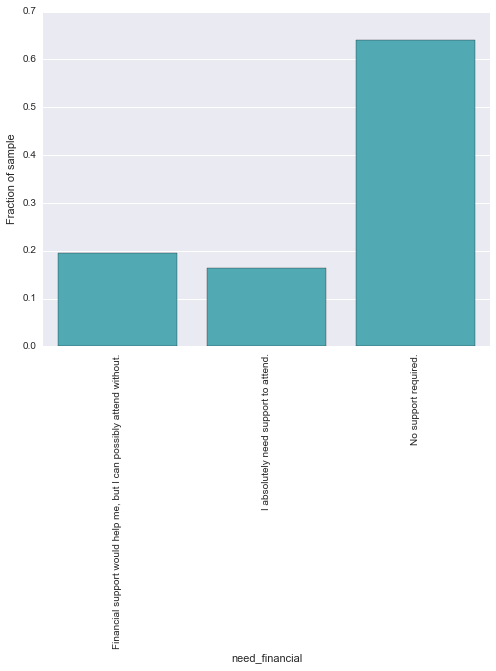

In [228]:
make_plot(fixed_categories[8])

### In terms of gender identity, do you consider yourself a minority with respect to the field of geospatial science?

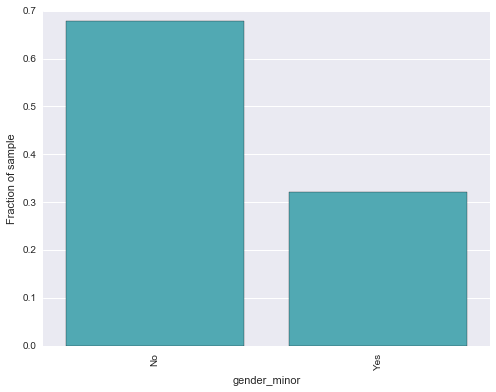

In [229]:
make_plot(fixed_categories[9])

### In terms of racial or ethnic identity, do you consider yourself a minority with respect to the field of geospatial science?

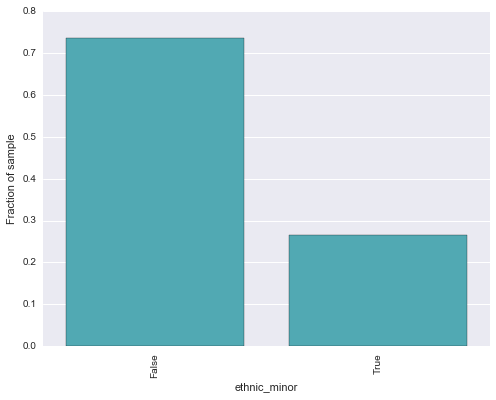

In [230]:
make_plot(fixed_categories[10])

In [231]:
weights = {
           'exp_geospatial': 1.0, 
           'exp_prog': 1.0,
           'gender_minor': 1.0,
           'ethnic_minor': 1.0,
           'exp_cmd': 1.0
          }

datatypes = {
            'exp_geospatial': 'categorical',
             'exp_prog': 'categorical',
             'gender_minor': 'categorical',
             'ethnic_minor': 'categorical',
             'exp_cmd': 'categorical'
             }

In [232]:
df['ethnic_minor'].unique()

array(['False', nan, 'True'], dtype=object)

In [233]:
exp_geo_mapper = entrofy.mappers.ObjectMapper(df["exp_geospatial"])
exp_geo_mapper.targets["I have extensive experience with geospatial data"] = 0.70
exp_geo_mapper.targets["I have some experience with geospatial data"] = 0.30

exp_prog_mapper = entrofy.mappers.ObjectMapper(df["exp_prog"])
exp_prog_mapper.targets["Program a little for coursework or research"] = 0.25
exp_prog_mapper.targets["Program heavily for my own research"] = 0.45
exp_prog_mapper.targets["Release code for others to use"] = 0.30

gender_minor_mapper = entrofy.mappers.ObjectMapper(df["gender_minor"])
gender_minor_mapper.targets["Yes"] = 0.65
gender_minor_mapper.targets["No"] = 0.35

ethnic_minor_mapper = entrofy.mappers.ObjectMapper(df["ethnic_minor"])
ethnic_minor_mapper.targets["True"] = 0.65
ethnic_minor_mapper.targets["False"] = 0.35

exp_cmd_mapper = entrofy.mappers.ObjectMapper(df["exp_cmd"])
exp_cmd_mapper.targets["I commonly use a command line in my work"] = 0.65
exp_cmd_mapper.targets["I occasionally use a command line in my work"] = 0.35

In [234]:
mappers = {
           "exp_geospatial": exp_geo_mapper, 
           "exp_prog": exp_prog_mapper, 
           "gender_minor": gender_minor_mapper,
           "ethnic_minor": ethnic_minor_mapper,
           "exp_cmd": exp_cmd_mapper
           }

In [235]:
df.columns

Index(['specific_project', 'specific_topics', 'specific_datasets', 'email',
       'exp_geospatial', 'exp_cmd', 'first_name', 'apply_geohack',
       'apply_hack', 'gender_minor', 'ethnic_minor', 'org_institute',
       'teach_topic', 'last_name', 'exp_prog', 'reason_attend', 'timestamp',
       'person_url', 'location', 'position', 'science_work', 'need_financial'],
      dtype='object')

In [236]:
mappers

{'ethnic_minor': <entrofy.mappers.ObjectMapper at 0x1a74f224c50>,
 'exp_cmd': <entrofy.mappers.ObjectMapper at 0x1a74f2247f0>,
 'exp_geospatial': <entrofy.mappers.ObjectMapper at 0x1a74f2240f0>,
 'exp_prog': <entrofy.mappers.ObjectMapper at 0x1a74f224550>,
 'gender_minor': <entrofy.mappers.ObjectMapper at 0x1a74f2242e8>}

In [237]:
weights

{'ethnic_minor': 1.0,
 'exp_cmd': 1.0,
 'exp_geospatial': 1.0,
 'exp_prog': 1.0,
 'gender_minor': 1.0}

In [238]:
idx, max_score = entrofy.core.entrofy(df, 60,
                                      mappers=mappers,
                                      weights=weights,
                                      seed=seed)
print(max_score)

51.9761247014


In [239]:
df.columns

Index(['specific_project', 'specific_topics', 'specific_datasets', 'email',
       'exp_geospatial', 'exp_cmd', 'first_name', 'apply_geohack',
       'apply_hack', 'gender_minor', 'ethnic_minor', 'org_institute',
       'teach_topic', 'last_name', 'exp_prog', 'reason_attend', 'timestamp',
       'person_url', 'location', 'position', 'science_work', 'need_financial'],
      dtype='object')

In [240]:
df[['first_name','last_name']].loc[idx].to_csv('accepted.csv')

In [248]:
df.loc[set(df.index) - set(idx)].to_csv('rejected.csv')